In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score
import plotly.express as px
import gc

import xgboost as xgb

SEED = 42

cat_feat_colors = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]
colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]

In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [32]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))

    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    #plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    if type(cat_col) == str:
        plt.subplot(1, 3, 2)
        plt.title("Countplot")
        sns.countplot(data=dataframe, x=cat_col, palette=colors)
        plt.tight_layout(pad=3)
    else:
        plt.subplot(1, 3, 2)
        plt.title("Countplot")
        sns.countplot(data=dataframe, x=cat_col[0], hue=cat_col[1], palette=colors)
        plt.tight_layout(pad=3)
        
    
    

In [4]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
check_df(data)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(7043, 21)
**********************************************************************
******************************* Types ********************************
**********************************************************************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Chu

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
data.isnull().values.any()

False

In [35]:
data.isna().values.any()

False

In [36]:
cat_df = data.select_dtypes(include="object")
cat_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [65]:
df = data.copy()

In [66]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [67]:
df.TotalCharges.isnull().value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

In [68]:
df.dropna(inplace=True)

In [69]:
df.TotalCharges.isnull().value_counts()

False    7032
Name: TotalCharges, dtype: int64

In [70]:
num_df = df.select_dtypes(include=["float64","int64"])
num_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [71]:
df.drop(columns="customerID", inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


####################################################################################################
No     5174
Yes    1869
Name: Churn, dtype: int64
####################################################################################################


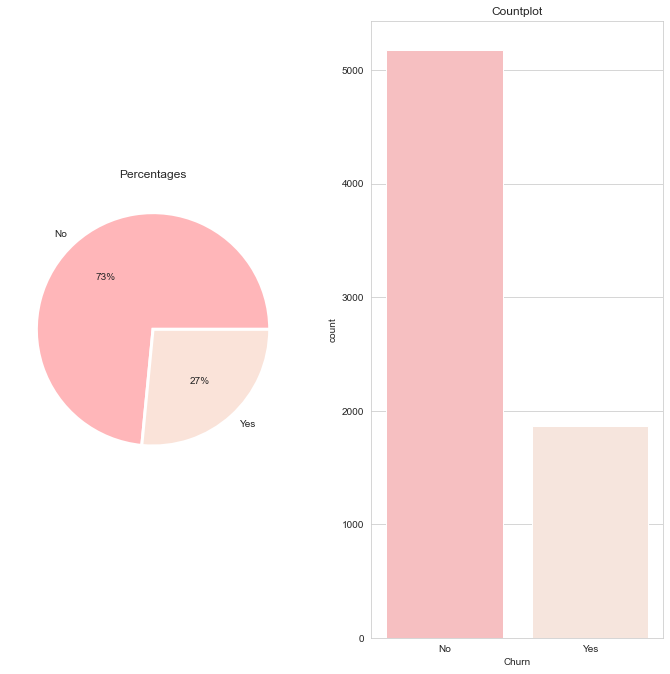

In [72]:
cat_plots(data, "Churn")

In [73]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [74]:
df.gender.dtype

dtype('O')

In [47]:
for i in df.columns:
    if df[i].value_counts().shape[0] == 2 and df[i].dtype == 'O':
        df[i].replace({'Yes':1, 'No': 0}, inplace = True)

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [22]:
df["gender"].replace({"Female": 1, "Male": 0}, inplace=True)

In [23]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}')

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [75]:
df["Churn"].replace(to_replace="Yes", value= 1, inplace=True)
df["Churn"].replace(to_replace="No", value= 0, inplace=True)

df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [76]:
df_dummies["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [77]:
df_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00
gender_Female,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00
gender_Male,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
Partner_No,7032.0,0.517491,0.499729,0.00,0.0000,1.000,1.0000,1.00
Partner_Yes,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents_No,7032.0,0.701507,0.457629,0.00,0.0000,1.000,1.0000,1.00


In [84]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

####################################################################################################
Male      3549
Female    3483
Name: gender, dtype: int64
####################################################################################################


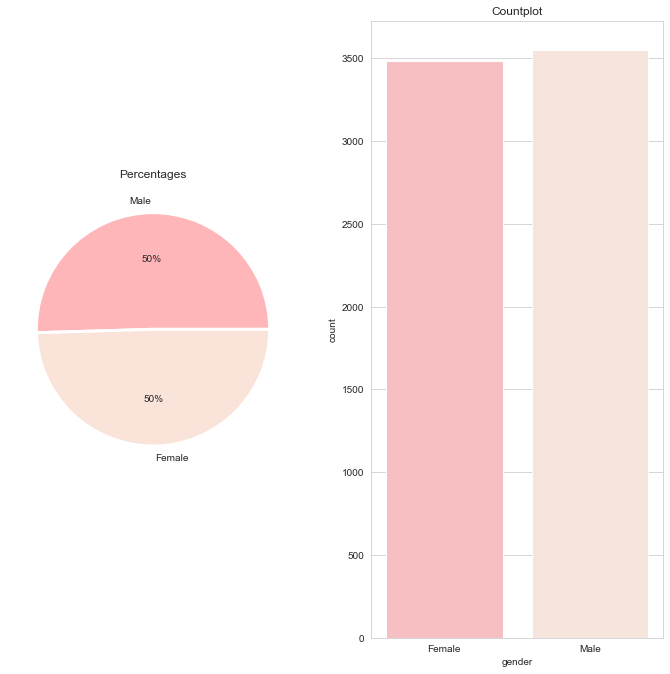

In [82]:
cat_plots(df, "gender")

####################################################################################################
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
####################################################################################################


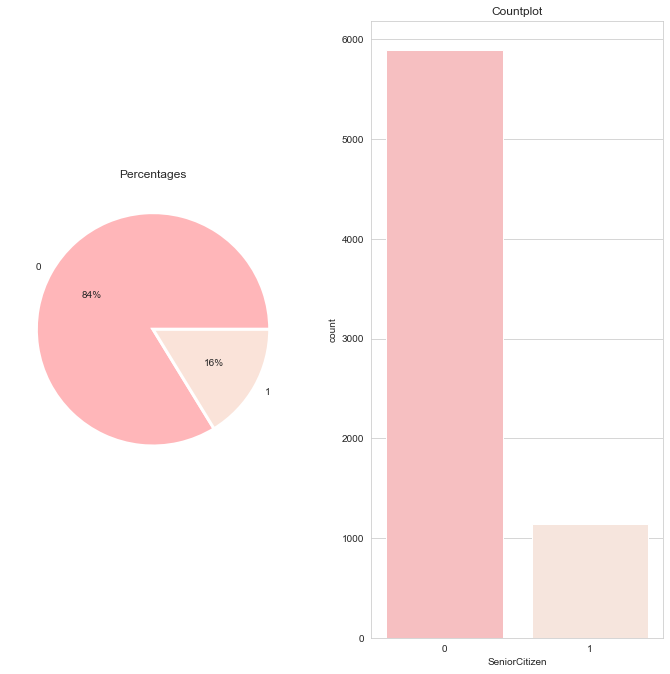

In [85]:
cat_plots(df, "SeniorCitizen")

####################################################################################################
No     3639
Yes    3393
Name: Partner, dtype: int64
####################################################################################################


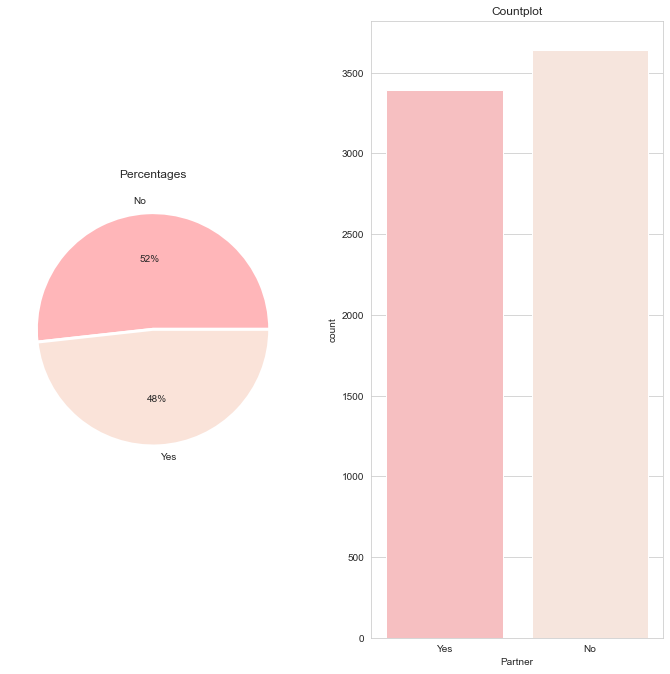

In [86]:
cat_plots(df, "Partner")

####################################################################################################
Partner  Dependents
No       No            3280
Yes      Yes           1740
         No            1653
No       Yes            359
dtype: int64
####################################################################################################


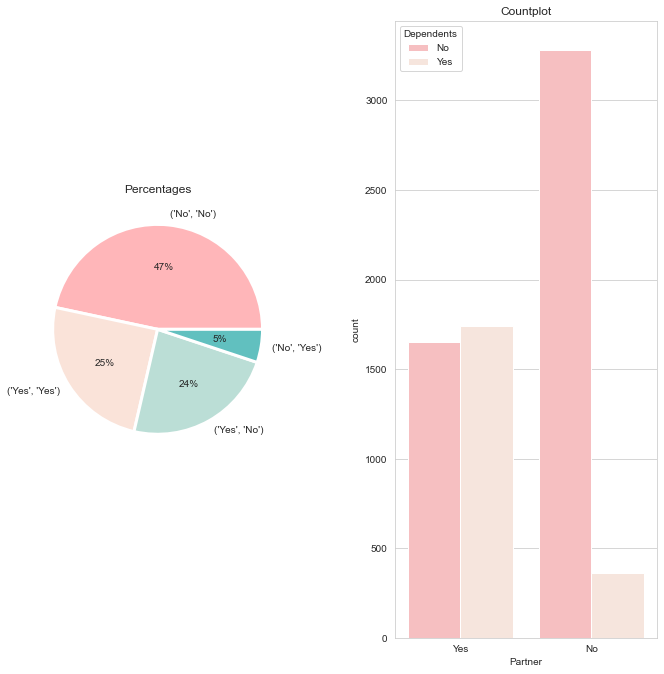

In [90]:
cat_plots(df, ["Partner", "Dependents"])

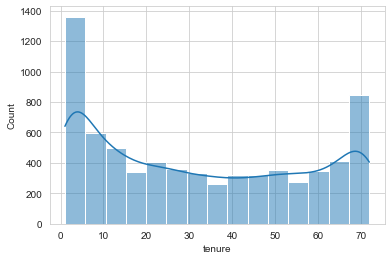

In [99]:
sns.histplot(df["tenure"], kde=True);

####################################################################################################
SeniorCitizen  gender
0              Male      2975
               Female    2915
1              Male       574
               Female     568
dtype: int64
####################################################################################################


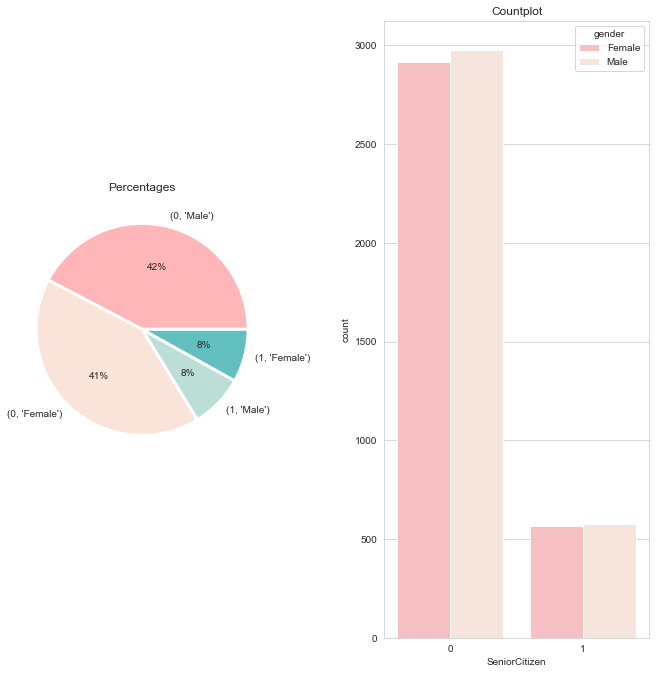

In [122]:
cat_plots(df, ["SeniorCitizen", "gender"])

####################################################################################################
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
####################################################################################################


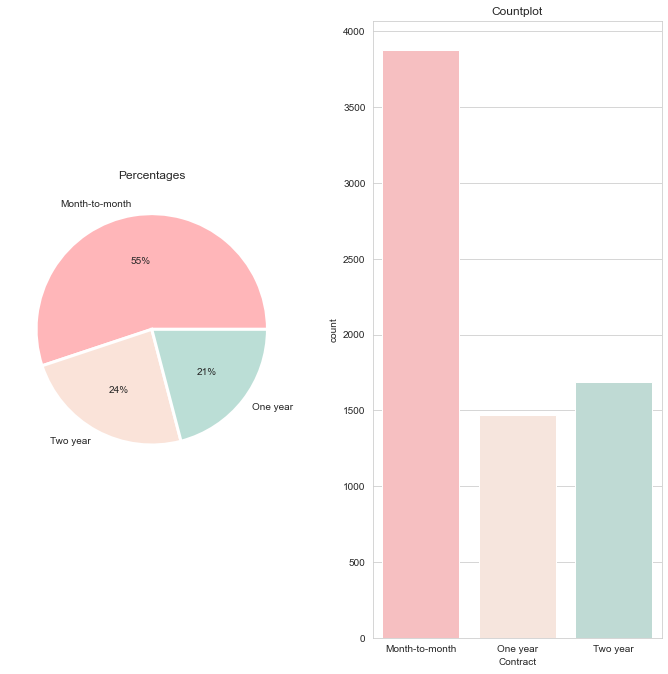

In [109]:
cat_plots(df, "Contract")

c:\Users\Furka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Furka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Two Year Contract')

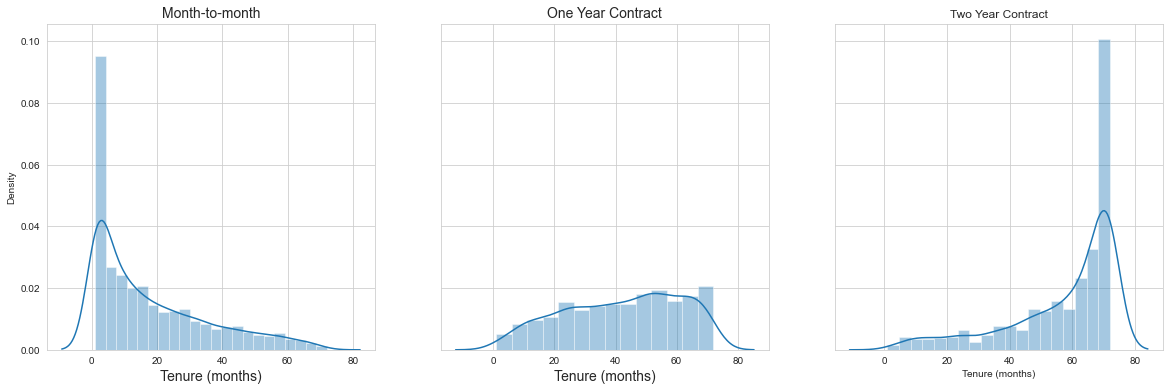

In [118]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))
ax= sns.distplot(df[df['Contract']=='Month-to-month']['tenure'], ax=ax1);
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Month-to-month',size = 14)
ax= sns.distplot(df[df['Contract']=='One year']['tenure'], ax=ax2);
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)
ax= sns.distplot(df[df['Contract']=='Two year']['tenure'], ax=ax3);
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')


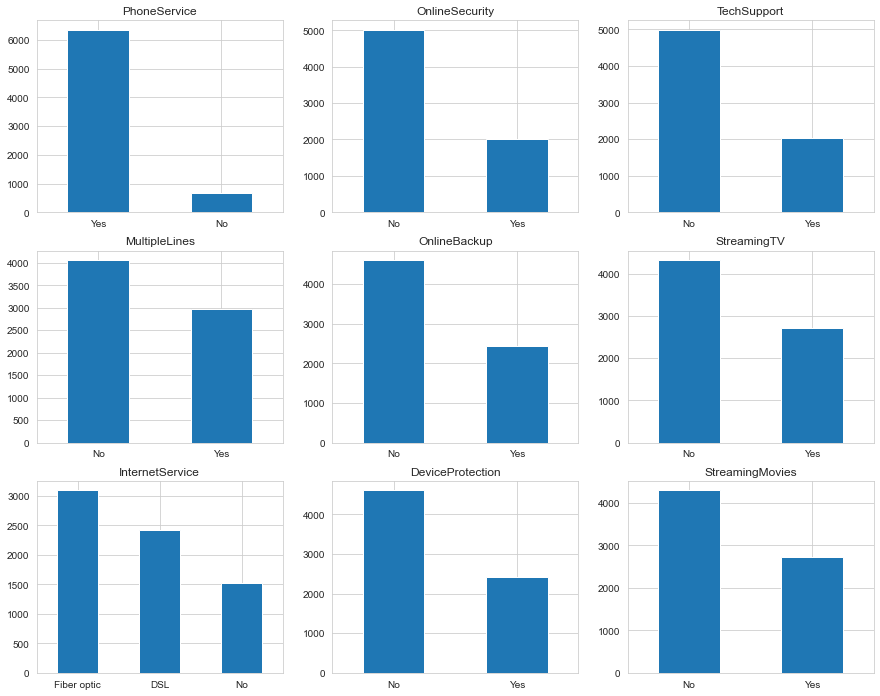

In [131]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

####################################################################################################
0    5163
1    1869
Name: Churn, dtype: int64
####################################################################################################


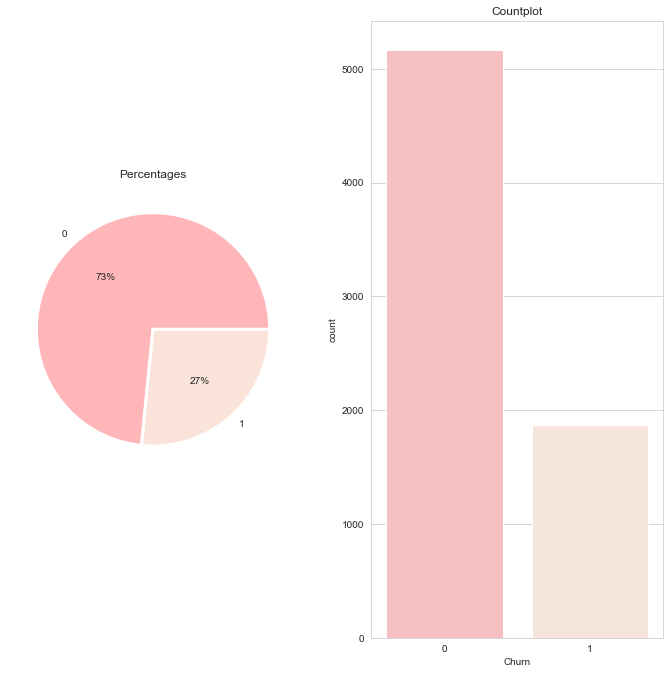

In [132]:
cat_plots(df, "Churn")

In data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

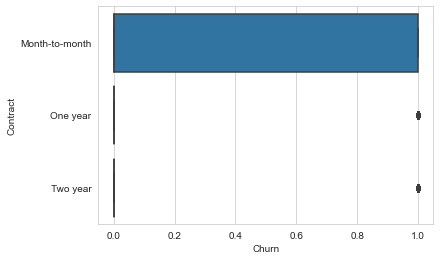

In [139]:
sns.boxplot(x= df["Churn"], y=df["Contract"], data=df)

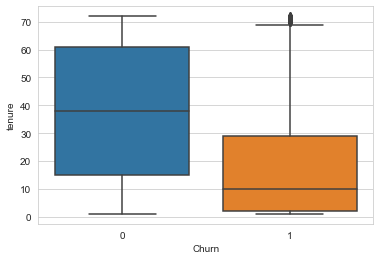

In [141]:
sns.boxplot(x= df["Churn"], y=df["tenure"], data=df);


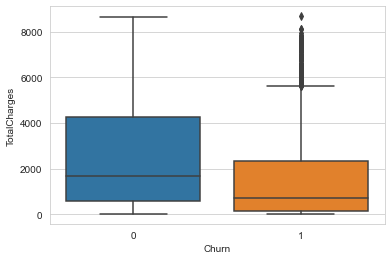

In [142]:
sns.boxplot(x= df["Churn"], y=df["TotalCharges"], data=df);


In [ ]:
df_dummies[(df_dummies["TotalCharges"] > 8000) & (df_dummies.Churn == 1)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1306,0,70,115.55,8127.6,1,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,0
3890,0,72,109.25,8109.8,1,1,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0
4610,0,72,117.80,8684.8,1,0,1,0,1,1,...,1,0,1,0,0,1,1,0,0,0


In [133]:
df.Contract.values

array(['Month-to-month', 'One year', 'Month-to-month', ...,
       'Month-to-month', 'Month-to-month', 'Two year'], dtype=object)

####################################################################################################
Churn  Contract      
0      Month-to-month    2220
1      Month-to-month    1655
0      Two year          1637
       One year          1306
1      One year           166
       Two year            48
dtype: int64
####################################################################################################


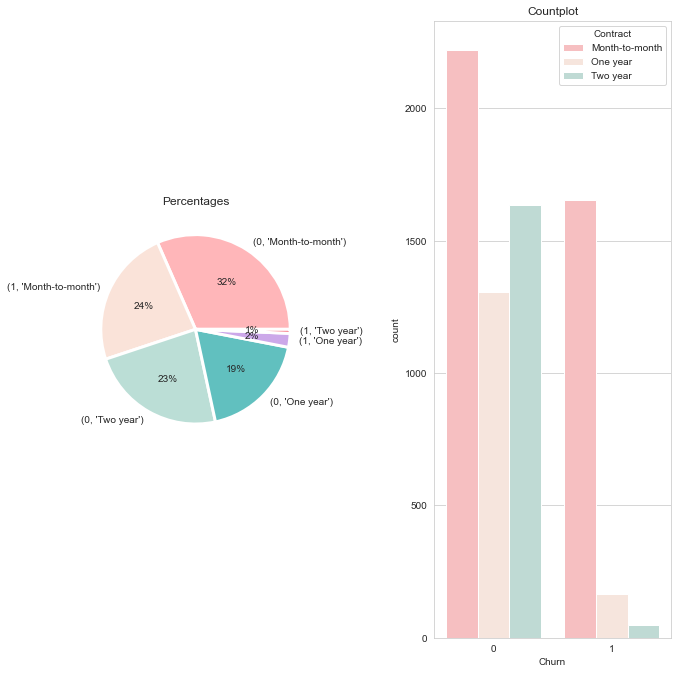

In [153]:
cat_plots(df, ["Churn", "Contract"])

####################################################################################################
Churn  InternetService
0      DSL                1957
       Fiber optic        1799
       No                 1407
1      Fiber optic        1297
       DSL                 459
       No                  113
dtype: int64
####################################################################################################


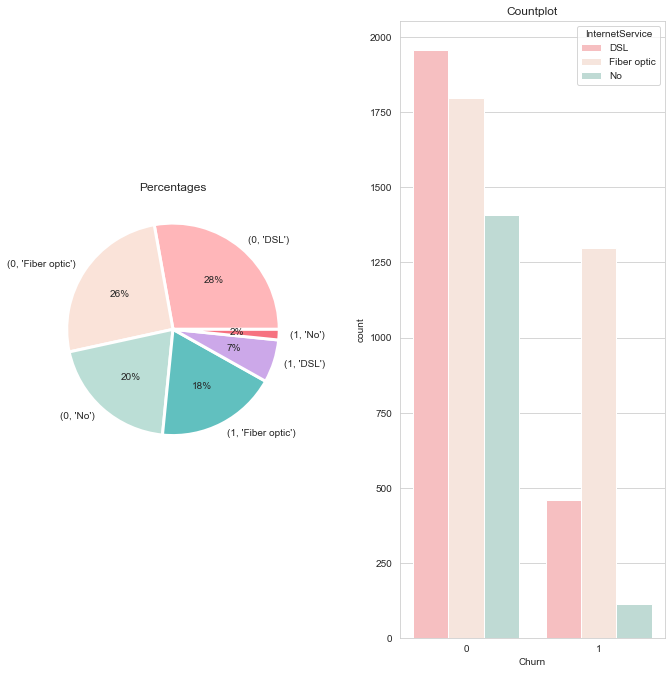

In [154]:
cat_plots(df, ["Churn", "InternetService"])

####################################################################################################
Churn  SeniorCitizen
0      0                4497
1      0                1393
0      1                 666
1      1                 476
dtype: int64
####################################################################################################


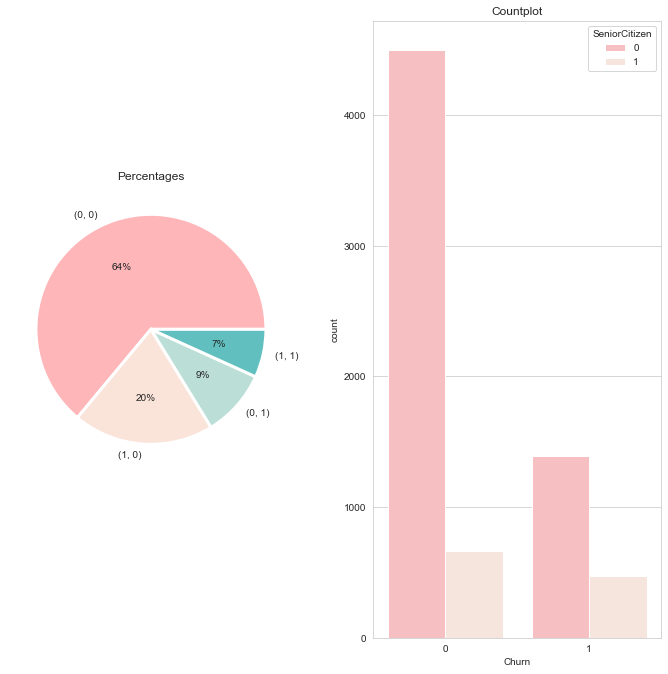

In [155]:
cat_plots(df, ["Churn", "SeniorCitizen"])

In [124]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [120]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [121]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [87]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


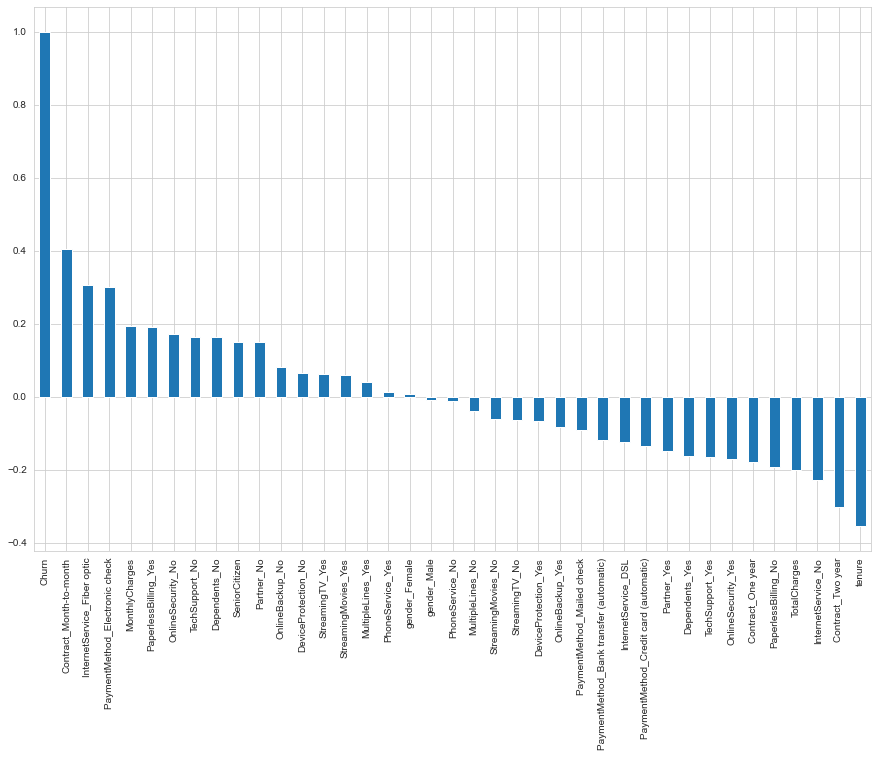

In [81]:
plt.figure(figsize=(15,10))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar');

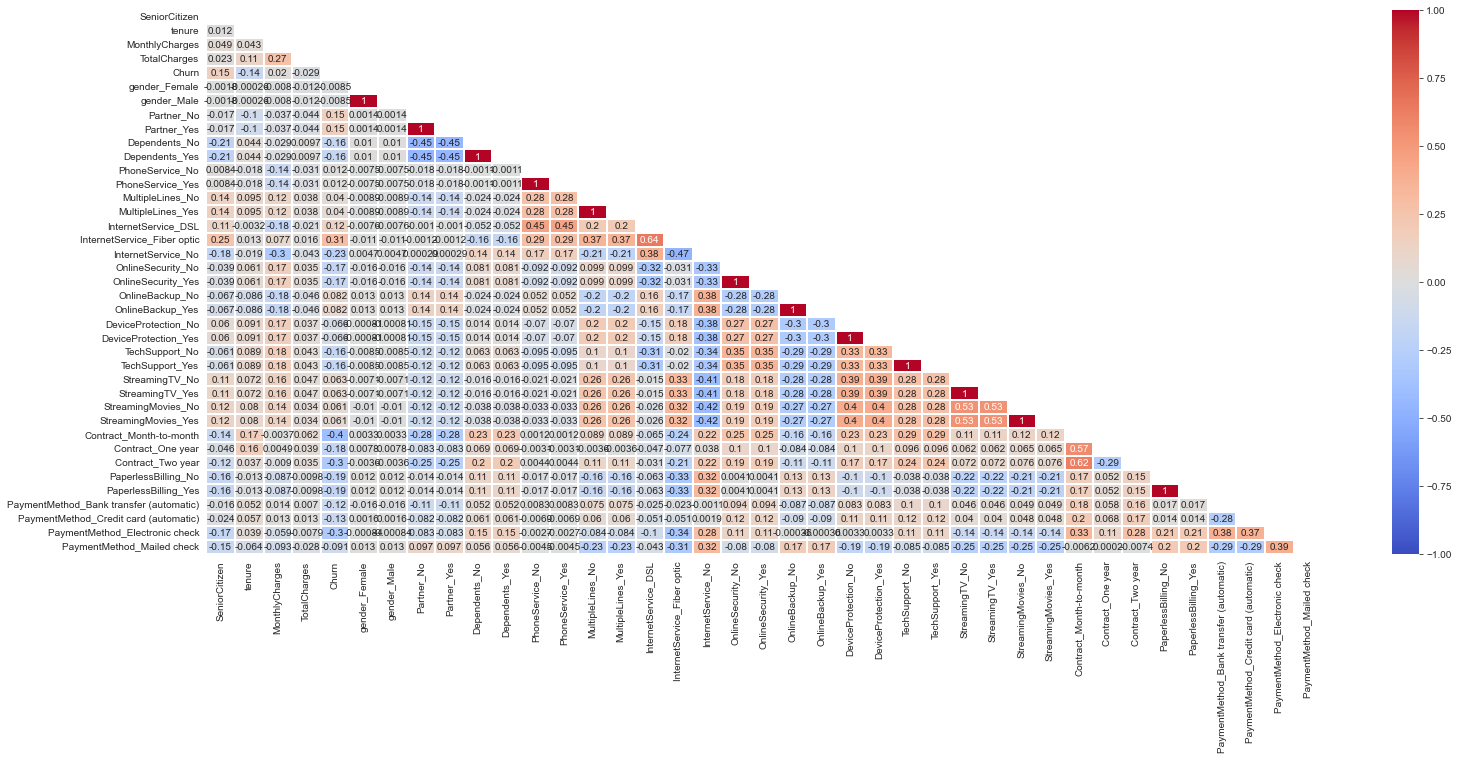

In [80]:
plt.figure(figsize=(25, 10))

corr = df_dummies.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [29]:
df_minmax_scaled = df.copy()

In [30]:
scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = MinMaxScaler()

df_minmax_scaled[scale_cols] = scaler.fit_transform(df_minmax_scaled[scale_cols])

In [31]:
for col in df_minmax_scaled.columns:
    print(f'{col}: {df_minmax_scaled[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [32]:
X = df_minmax_scaled.drop(columns='Churn')
y = df_minmax_scaled["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [33]:
X_train.shape

(5625, 26)

In [34]:
X_test.shape

(1407, 26)

In [35]:
clf_xgb = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate= 0.1,
    subsample=0.8,
    colsample_bytree=0.2,
    random_state = SEED
)
clf_xgb.fit(X_train, y_train)
accuracy_xgb = clf_xgb.score(X_test, y_test)
print(accuracy_xgb)

0.7711442786069652


In [36]:
clf_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=SEED
)
clf_rf.fit(X_train, y_train)
accuracy_rf = clf_rf.score(X_test, y_test)
print(accuracy_rf)

0.7796730632551528


In [54]:
clf_nn = keras.Sequential([
    # input layer
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid'),
    # we use sigmoid for binary output
    # output layer
]
)

In [55]:
# time for compilation of neural net.
clf_nn.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
clf_nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4962 - accuracy: 0.7540
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8027
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8087
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8076
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8105
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4055 - accura

In [57]:
clf_nn.evaluate(X_test, y_test)

44/44 [==============================] - 0s 977us/step - loss: 0.4837 - accuracy: 0.7726


[0.48372700810432434, 0.7725657224655151]

In [40]:
class Ensemble(object):
    
    def __init__(self, k, stacker, base_models):
        
        self.k = k # How many folds used in cross validation
        
        self.stacker = stacker # Final model used for stacking
        
        self.base_models = base_models # Base models in specific layers

    def fit_predict(self, X, y, pred_matrix):
        """
        This function calculates the meta features for each layer.
        """
        X = np.array(X) 
        
        y = np.array(y) 
        
        pred_matrix = np.array(pred_matrix)

        kf = KFold(n_splits=self.k, shuffle=True, random_state=0) # Split the train data into k folds

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        
        S_test = np.zeros((pred_matrix.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models): # Iterate through the base models in a layer
            S_test_i = np.zeros((pred_matrix.shape[0], self.k))

            for j, (train_idx, test_idx) in enumerate(kf.split(X)):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                
                clf.fit(X_train, y_train) # Fit the specific base model
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(pred_matrix)[:]

            S_test[:, i] = S_test_i.mean(1)
            
        self.stacker.fit(S_train, y)
        
        y_pred = self.stacker.predict(S_test)[:]
    
        return S_train, y_pred, S_test
    
    def layer_pred(self, num_layer, X_input, Y_input, base_models, models, pred_matrix, endmodel):
        """
        This function reads in the train and test data, iterates through the layers,
        and outputs the predictions.
        """
        # level 1:
        S_train, y_pred, S_test = self.fit_predict(X_input, Y_input, pred_matrix)
        # level num_layer:
        ##BEGIN iteration##
        for index in range(0,num_layer):
            
            self.base_models = models[index] 

            S_train, y_pred, S_test = self.fit_predict(S_train, Y_input, S_test)
            
        ##END iteration##
        
        endmodel.fit(S_train, Y_input)
        
        y_pred = endmodel.predict(S_test)[:]
        
        return y_pred

In [41]:
level1 = [neural_network.MLPClassifier(hidden_layer_sizes=(1000, 15), random_state = SEED, max_iter = 500),ensemble.RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=SEED), xgb.XGBClassifier(n_estimators=40, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, random_state = SEED)]
# Second level regressors
level2 = [xgb.XGBClassifier(), linear_model.LogisticRegression()]

In [42]:
models = {0: level2}

In [43]:
fitter_three = Ensemble(10, xgb.XGBClassifier(), level1)
#y_stack1_fitter_three = fitter_three.layer_pred(1, x1, y1, level1, models, x2, xgb.XGBRegressor()) -------x2 = x_test

In [44]:
y_stack1_fitter_three = fitter_three.layer_pred(1, X_train, y_train, level1, models, X_test, xgb.XGBClassifier()) 

In [49]:
y_stack1_fitter_three.shape

(1407,)

In [46]:
print(accuracy_score(y_test, y_stack1_fitter_three), precision_score(y_test, y_stack1_fitter_three))

0.7967306325515281 0.6774193548387096


In [50]:
print(accuracy_score(y_test, y_stack1_fitter_three), precision_score(y_test, y_stack1_fitter_three)) #max_iter = 500


0.7967306325515281 0.6774193548387096


In [47]:
# Write the predictions on the test set to a csv
#prediction = pd.DataFrame(y_stack1_fitter_three, columns=['redshift']).to_csv('submission.csv', index_label = 'id')

In [48]:
df_minmax_scaled.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7032, 27), (5625, 26), (5625,), (1407, 26), (1407,))

## To-Do: EDA, feature engineering

In [34]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

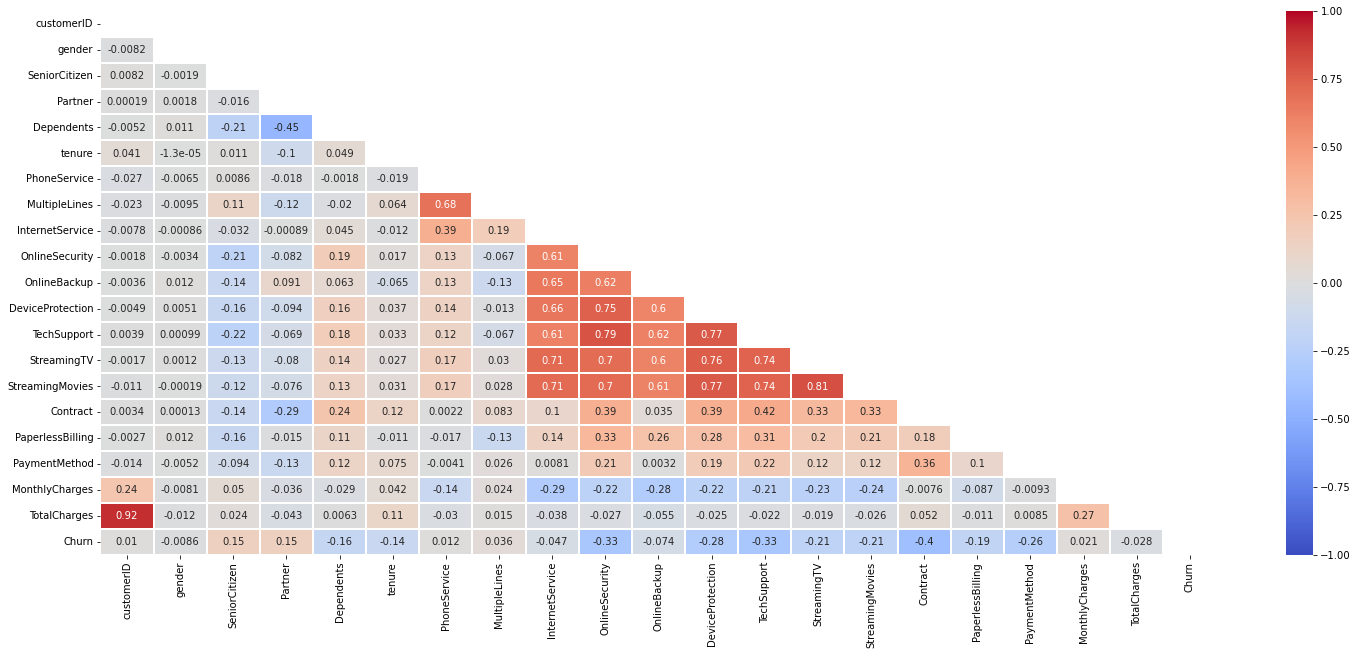

In [35]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [38]:
from pivottablejs import pivot_ui

In [39]:
pivot_ui(data)

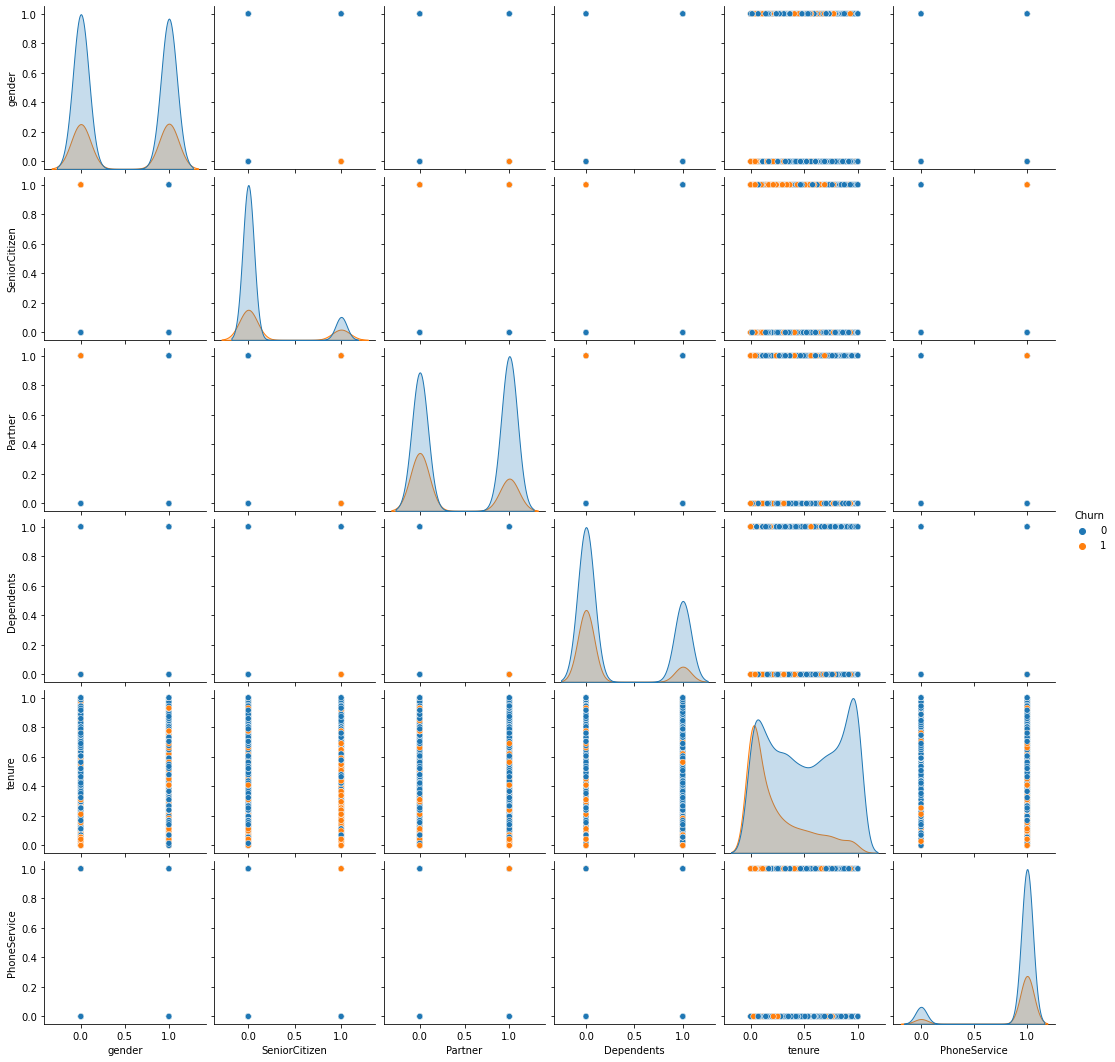

In [45]:
sns.pairplot(df_minmax_scaled, vars=df_minmax_scaled.columns[:6], hue='Churn')

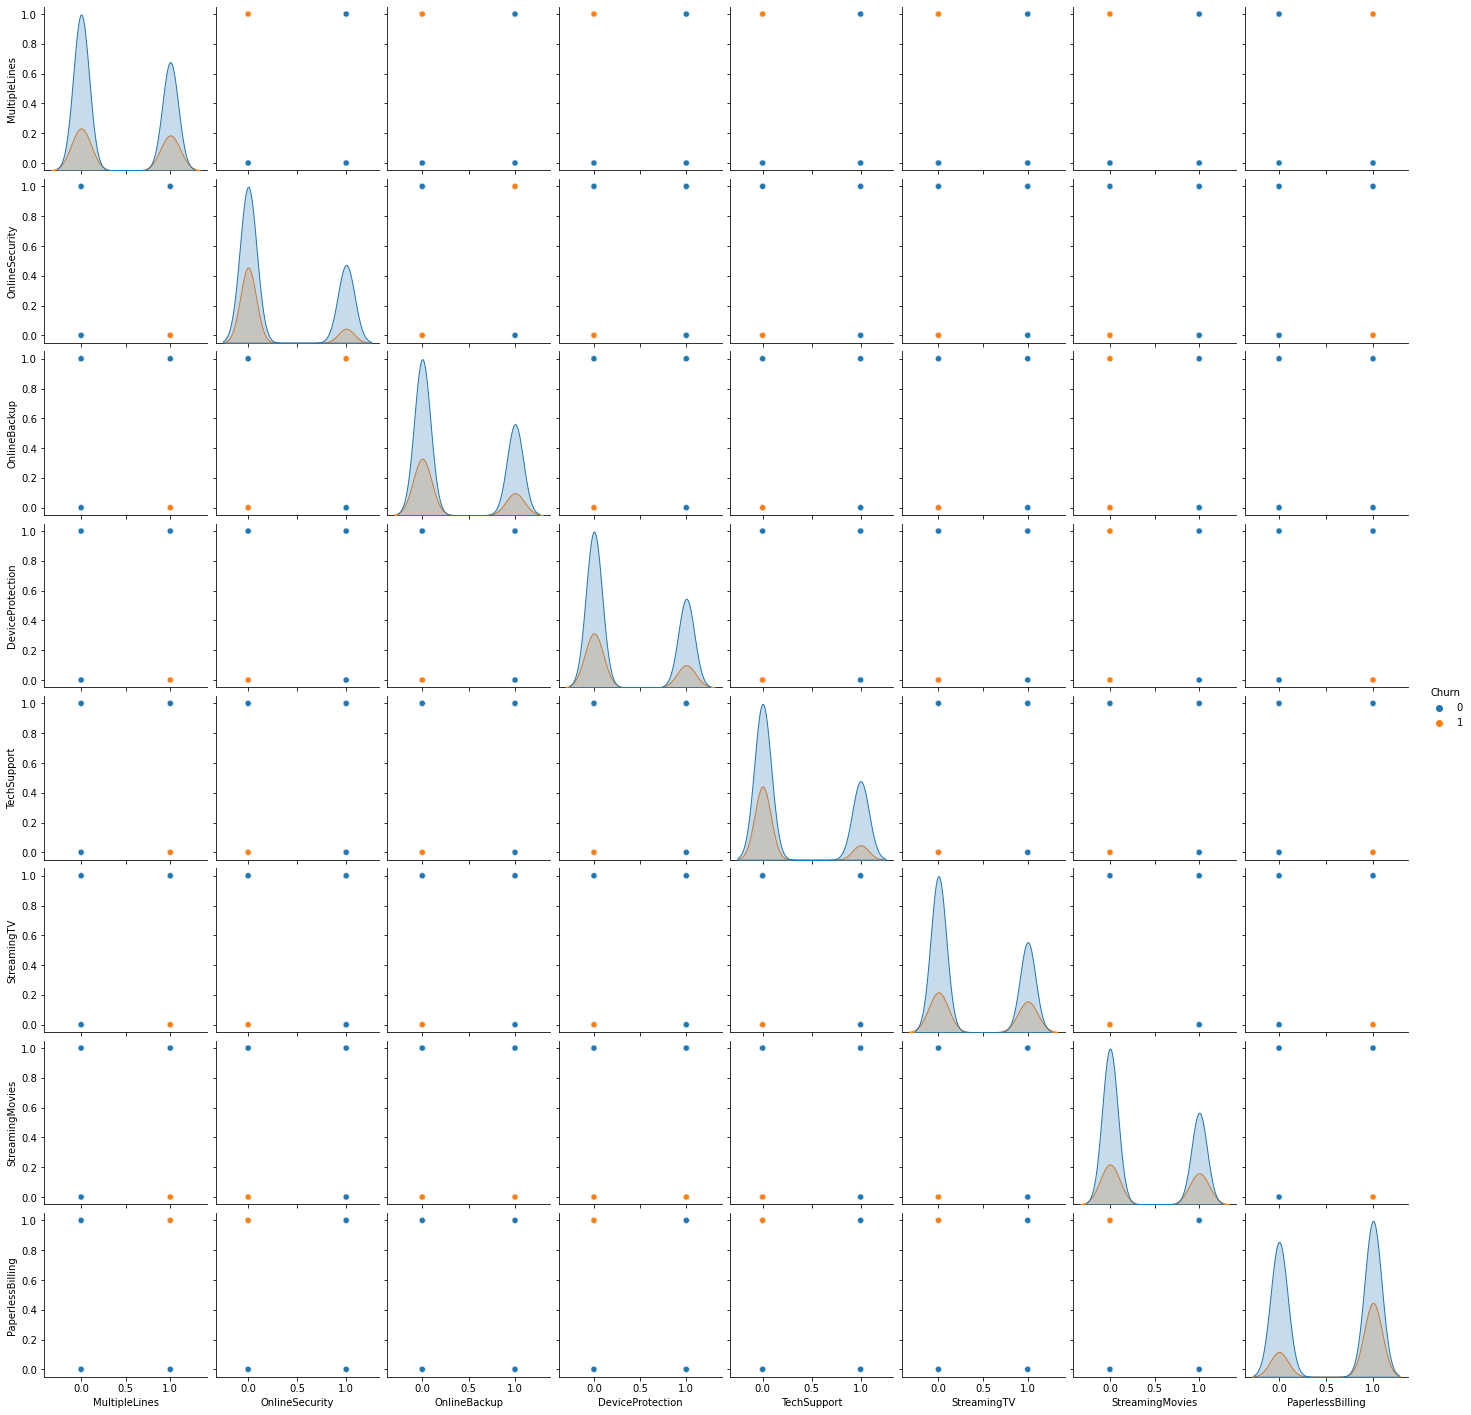

In [47]:
sns.pairplot(df_minmax_scaled, vars=df_minmax_scaled.columns[6:14], hue='Churn')


<AxesSubplot:xlabel='Churn', ylabel='Count'>

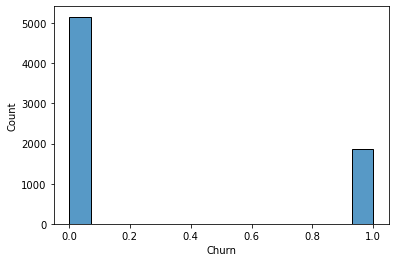

In [53]:
sns.histplot(df_minmax_scaled["Churn"])

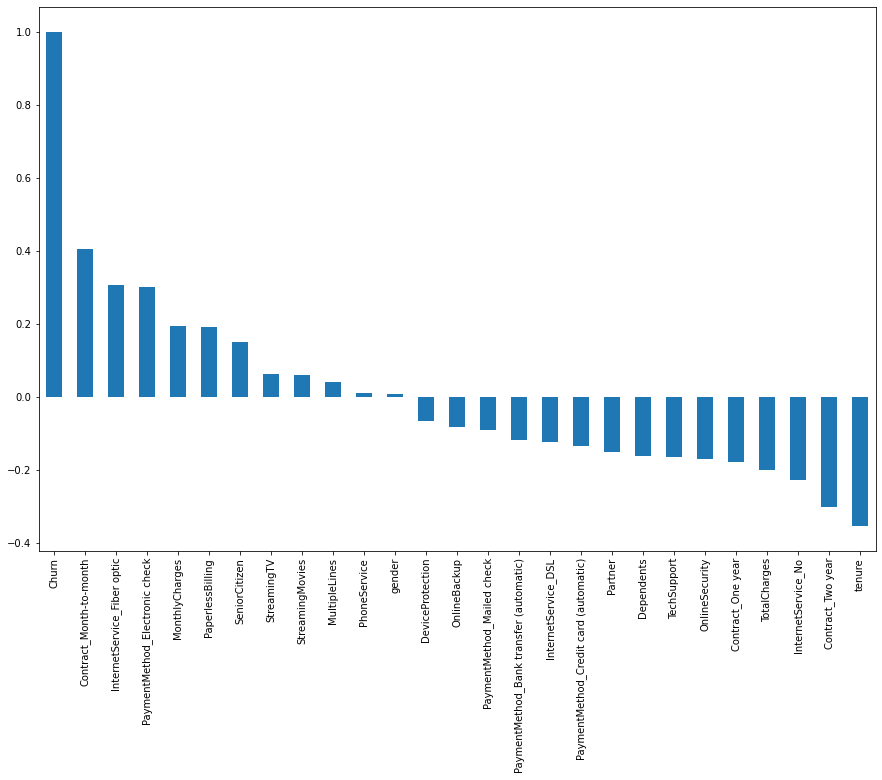

In [56]:
plt.figure(figsize=(15,10))
df_minmax_scaled.corr()['Churn'].sort_values(ascending=False).plot(kind='bar');